# **SCDM - P3**
#### Cameron Carver - AOS 2024

### 1. The Antarctic continent and the Southern Ocean starting from 60°S

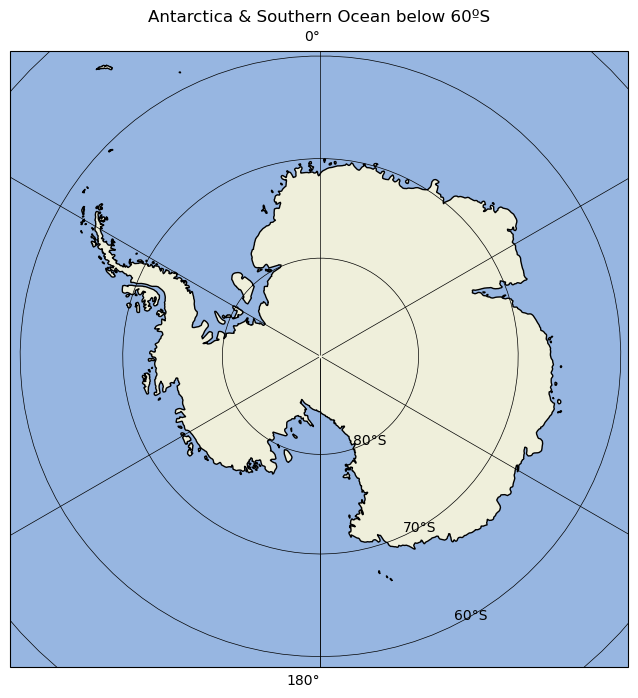

In [1]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create and plot a figure using specific projection and extents
fig = plt.figure(figsize=[8, 8])
ax1 = fig.add_subplot( projection=ccrs.SouthPolarStereo())
ax1.set_extent([-180, 180, -90, -59], ccrs.PlateCarree())

# Add features to improve visuals
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.coastlines(lw=1)

# Add gridlines and labels to provide context and reference 
ax1.gridlines(draw_labels=True, color ='k',linewidth=0.5, rotate_labels=180, xpadding=10)
ax1.set_title('Antarctica & Southern Ocean below 60ºS')
plt.show()

_Figure 1._ Antarctic and Souther Ocean below 60ºS using a southern polar sterographic projection as it is a projection centered on the souther pole providing a good basis from which to visualize lower latitudes.

### 2. South Atlantic, from 20°S to 50°S - Including major cities

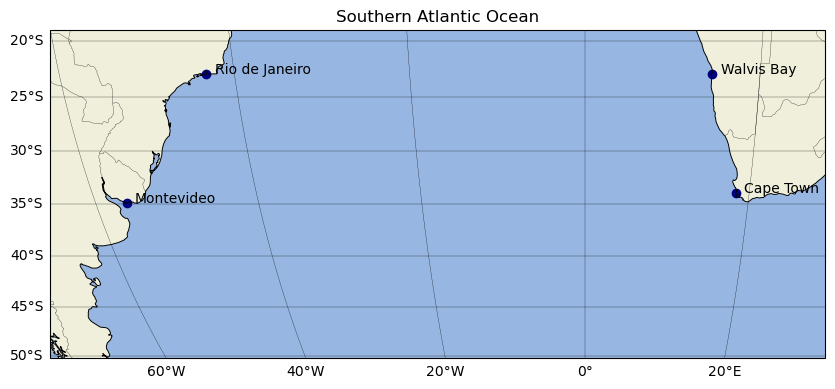

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='educational')

# Plot figure and relevent extents to the South Atlantic
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection=ccrs.Mollweide())
extent = [-60, 27, -42, -19]
ax.set_extent(extent)

# Add defining features to the map to improve visualization
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, lw=0.2)
ax.add_feature(cfeature.COASTLINE, lw=0.7)

# Add gridlines, title and labels to provide context and reference 
gl = ax.gridlines(draw_labels=True,x_inline=False, color='k', linewidth=0.2)
gl.right_labels = False
gl.top_labels = False
ax.set_title('Southern Atlantic Ocean')

# Use the Nominatim service to call the locations of relevant major cities
place = ['Cape Town','Walvis Bay','Rio de Janeiro','Montevideo']
address = []
for p in place:
    loc = geolocator.geocode(p,language="en")
    address.append(loc)

# Add called cities names to the map and place a dot marker at their location
for p in range(len(place)):
    ax.text(address[p].longitude+1,address[p].latitude,place[p],transform=ccrs.Geodetic())
    plt.scatter(address[p].longitude,address[p].latitude, transform=ccrs.Geodetic(), color='#000080')

_Figure 2._ The Southern Atlantic Ocean between 20ºS and 50ºS, using a Mollweide projection as it provides a good balance between an orthogrpahic and a platecarree projections of displaying the curvature distortion.

### 3. False Bay coastline from GSHHG database - Coarse, Intermediate and Full resolution

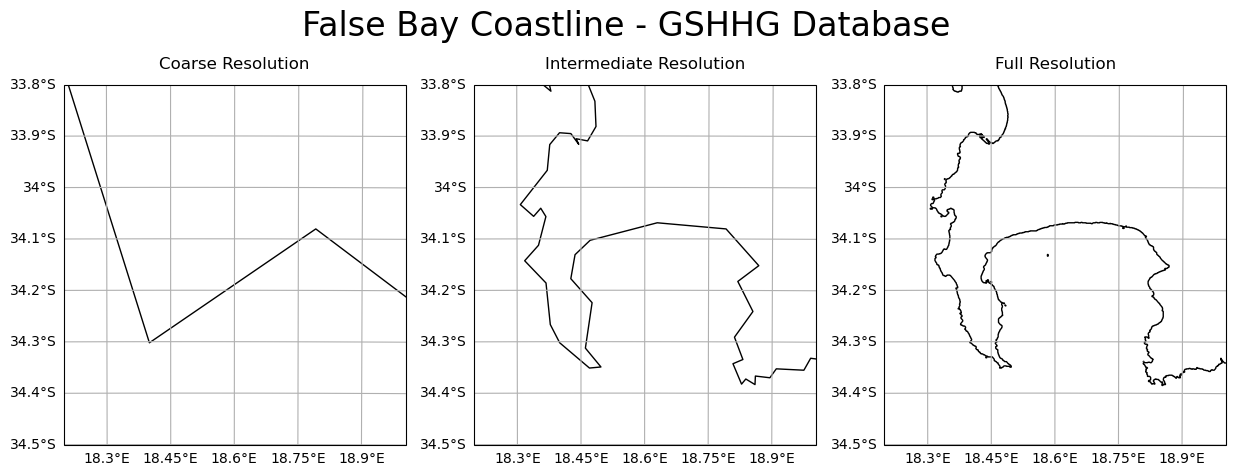

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

# Define center of area of interest and projection type
central_lon, central_lat = 18.5, -34.2
fig, ax = plt.subplots(1,3,figsize=(15,10),subplot_kw={'projection':ccrs.Orthographic(central_lon, central_lat)})

# Call different resolution level GSHHG data
cl_low = cfeature.GSHHSFeature(scale='coarse')
cl_int = cfeature.GSHHSFeature(scale='intermediate')
cl_high = cfeature.GSHHSFeature(scale='full')

# Define parameters for each subplot
res = [cl_low, cl_int, cl_high]
lab = ['Coarse Resolution','Intermediate Resolution','Full Resolution']
gl = ['gl0', 'gl1', 'gl2']
extent = [18.2, 19, -34.5, -33.8]

# Iterate defined features over each plot and clean up labeling
for i in range(0,3):
    ax[i].set_extent(extent)
    ax[i].add_feature(res[i])
    ax[i].set_title(lab[i])
    gl[i] = ax[i].gridlines(draw_labels=True)
    gl[i].right_labels = False
    gl[i].top_labels = False

# Add title to figure and plot
fig.suptitle('False Bay Coastline - GSHHG Database', fontsize = 24, y=0.75)
plt.show()

_Figure 3._ Side by side plots of the False Bay coastline at coarse, intermediate, and full resolution from the GSHHG database. An orthographic projection was selected to best display the details of the coastline that may become warped with other projections.